J'ai transposé le TP qu'on a fait en R en un notebook

In [45]:
import numpy as np
import matplotlib.pyplot as plt

Voila plusieurs noyaux

In [46]:
def cosKern(x,y,theta,sigma):
  x = np.atleast_2d(x).T
  y = np.atleast_2d(y)
  dist = (x-y)/theta
  return sigma**2*np.cos(dist)

def expKern(x,y,theta,sigma):
  x = np.atleast_2d(x).T
  y = np.atleast_2d(y)
  dist = (x-y)/theta
  return sigma**2*np.exp(-abs(dist)**2)

def mat5_2Kern(x,y,theta,sigma):
  x = np.atleast_2d(x).T
  y = np.atleast_2d(y)
  dist = abs(x-y) * np.sqrt(5) / theta
  return sigma**2*(1+dist+dist**2/3)*np.exp(-dist)

def mat3_2Kern(x,y,theta,sigma):
  x = np.atleast_2d(x).T
  y = np.atleast_2d(y)
  dist = abs(x-y) * np.sqrt(3) / theta
  return sigma**2*(1+dist)*np.exp(-dist)

def sqr_expKern(x,y,theta,sigma):
  x = np.atleast_2d(x).T
  y = np.atleast_2d(y)
  dist = abs(x-y) / theta
  return sigma**2*np.exp(-dist**2/2)

In [50]:
x=np.linspace(-1,1,200)

def Simulateur(x):
  return np.sin(2*np.pi*x)+x**2

y=Simulateur(x)

In [48]:
def condMean(x,X,Y,kern,sigma,theta):
  k_xX=kern(x, X, sigma,theta)
  k_XX=kern(X, X, sigma,theta)
  return k_xX @ np.linalg.inv(k_XX) @ Y

def condVar(x,X,Y,kern,sigma,theta):
  k_xx=kern(x, x, sigma,theta)
  k_xX=kern(x, X, sigma,theta)
  k_Xx=np.transpose(k_xX)
  k_XX=kern(X, X, sigma,theta)
  return k_xx - k_xX @ np.linalg.inv(k_XX) @ k_Xx

C:\Users\Victor Davodeau\AppData\Local\Temp\ipykernel_22700\2466132851.py:11: RuntimeWarning: invalid value encountered in sqrt
  std = np.sqrt(np.diag(Var))


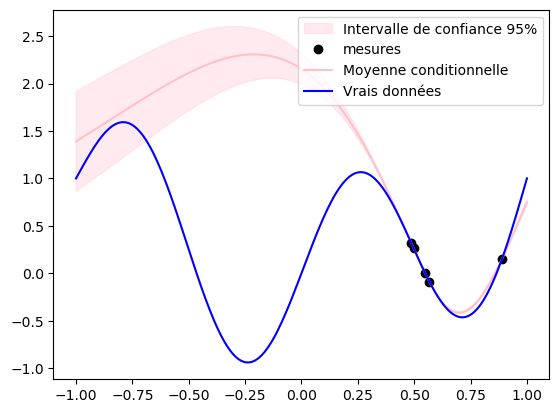

In [55]:
p=5                                                          #nombre de mesures que l'on fait
indices = np.random.choice(len(x), size=p, replace=False)    #Je trouve cool de prendre des points au hasard
X = x[indices]
Y=Simulateur(X)

sigma=1
theta=0.3

Mean = condMean(x,X,Y,mat5_2Kern,sigma,theta)
Var = condVar(x,X,Y,mat5_2Kern,sigma,theta)
std = np.sqrt(np.diag(Var))

upper=Mean+1.96*std
lower=Mean-1.96*std

plt.fill_between(x, lower, upper,color='pink', alpha=0.3,label='Intervalle de confiance 95%')
plt.plot(X,Y,'o',color='black',label='mesures')
plt.plot(x,Mean,color='pink',label='Moyenne conditionnelle')
plt.plot(x,y,color='blue',label='Vrais données')
plt.legend()

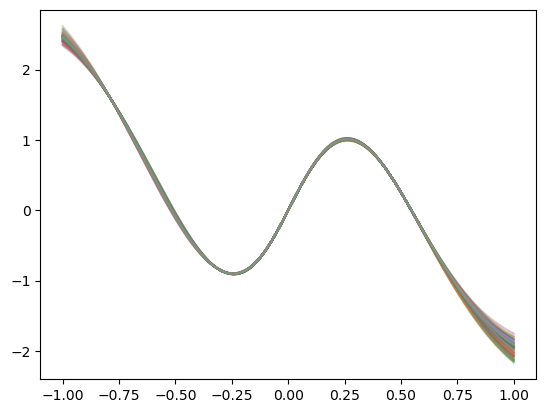

In [54]:
for i in range(100):
  tirage=np.random.multivariate_normal(mean=Mean, cov=Var)
  plt.plot(x,tirage,alpha=0.3)

